In [202]:
import matplotlib.pyplot as plt
from ase.optimize.sciopt import *               
from ase.utils.geometry import *
from ase.lattice.spacegroup import crystal
from ase.visualize import *
from ase.lattice.surface import surface
from ase import Atoms
from ase import io
from ase.io.cif import read_cif
from ase.io.vasp import write_vasp
from abtem.visualize import show_atoms

# supercell for delta-CsPbI3

Cell([10.4342, 9.581, 17.761])


Text(0, 0.5, 'z[$\\AA$]')

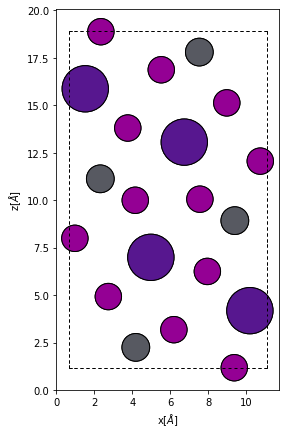

In [207]:
#import the unit cell from cif file

unit_cell = io.read('delta.cif')

supercell =  unit_cell.repeat((1,2,1))

view(supercell)
print(supercell.get_cell())

fig, ax = plt.subplots(figsize=(7,7))

plot_atoms(supercell, ax, radii=0.5, rotation=('90x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax.set_xlabel(r'x[$\AA$]')
ax.set_ylabel(r'z[$\AA$]')

# write the cell to a vaps file

#write_vasp('delta.vasp', supercell, vasp5=True, direct=True)

## relax this cell with VASP

# supercell for cubic-CsPbI3

/home/ahlawat/.local/lib/python3.9/site-packages/ase/io/cif.py:401: UserWarning: crystal system 'cubic' is not interpreted for space group Spacegroup(221, setting=1). This may result in wrong setting!
  warnings.warn(


Cell([12.5788, 12.5788, 12.5788])


Text(0, 0.5, 'z[$\\AA$]')

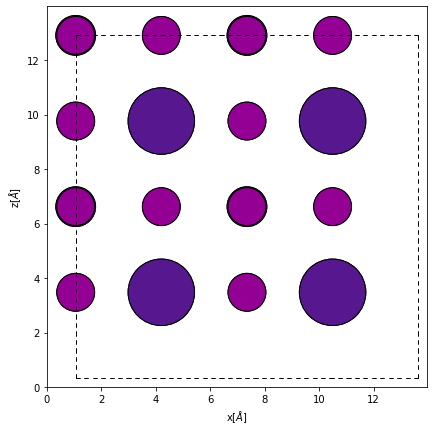

In [217]:
#import the unit cell from cif file

unit_cell = io.read('cubic.cif')

supercell =  unit_cell.repeat((2,2,2))

view(supercell)
print(supercell.get_cell())

fig, ax = plt.subplots(figsize=(7,7))

plot_atoms(supercell, ax, radii=0.5, rotation=('90x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax.set_xlabel(r'x[$\AA$]')
ax.set_ylabel(r'z[$\AA$]')

# write the cell to a vaps file

#write_vasp('cubic.vasp', supercell, vasp5=True, direct=True)

## relax this cell with VASP

# Cubic Cesium Lead Iodide Slab

Cell([[12.603239558781166, 0.0, 0.0], [-2.5706572064989603e-07, 12.603239544278697, 0.0], [0.0, 0.0, 52.80968270347845]])


<AxesSubplot:xlabel='y [Å]', ylabel='z [Å]'>

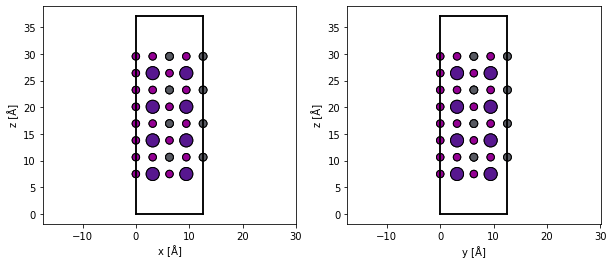

In [214]:
import matplotlib.pyplot as plt
from ase.optimize.sciopt import *               
from ase.utils.geometry import *
from ase.lattice.spacegroup import crystal
from ase.visualize import *
from ase.lattice.surface import surface
from ase import Atoms
from ase import io
from ase.io.cif import read_cif
from ase.io.vasp import write_vasp
from abtem.visualize import show_atoms

#import the unit cell from relaxed vasp output

unit_cell = io.read('bulk_cubic_relaxed.vasp')

miller_index = (1, 0, 0) 
n_layers_unit_cell = 3            #  number of unit cells
dist_vacuum = 7.5                 # vacuum above surface

surface = surface(unit_cell, miller_index, n_layers_unit_cell, dist_vacuum, periodic=True);
surface = sort(surface)

del surface[surface.positions[:, 2] > 40]
#remove bottom layers
del surface[surface.positions[:, 2] < 14]
#supercell =  unit_cell.repeat((1,2,1))

#view(surface)
print(surface.get_cell())

surface.center(vacuum=7.5, axis=2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
show_atoms(surface, plane='xz', ax = ax1)
show_atoms(surface, plane='yz', ax = ax2)

# write the cell to a vaps file

#write_vasp('cubic_001.vasp', surface, vasp5=True, direct=True)

# Hexagonal delta-Cesium Lead Iodide Slab

Cell([[10.635102864851367, 0.0, 0.0], [1.2965121504590845e-06, 9.64642391383797, 0.0], [0.0, 0.0, 51.23549158545453]])


<AxesSubplot:xlabel='y [Å]', ylabel='z [Å]'>

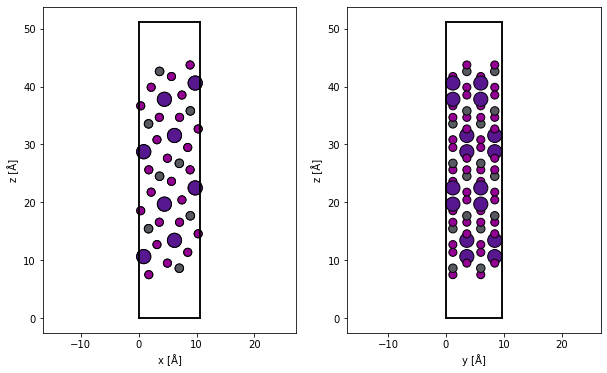

In [215]:
import matplotlib.pyplot as plt
from ase.optimize.sciopt import *               
from ase.utils.geometry import *
from ase.lattice.spacegroup import crystal
from ase.visualize import *
from ase.lattice.surface import surface
from ase import Atoms
from ase import io
from ase.io.cif import read_cif
from ase.io.vasp import write_vasp
from abtem.visualize import show_atoms

#import the unit cell from relaxed vasp output

unit_cell = io.read('bulk_hexagonal_relaxed.vasp')

miller_index = (0, 0, 1) 
n_layers_unit_cell = 2          # number of unit cells
dist_vacuum = 7.5                 # vacuum above surface

surface = surface(unit_cell, miller_index, n_layers_unit_cell, dist_vacuum, periodic=True);
surface = sort(surface)
#supercell =  unit_cell.repeat((1,2,1))

#del surface[surface.positions[:, 2] > 35]
#remove bottom layers
#del surface[surface.positions[:, 2] < 14]

view(surface)
print(surface.get_cell())


#surface.center(vacuum=7.5, axis=2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
show_atoms(surface, plane='xz', ax = ax1)
show_atoms(surface, plane='yz', ax = ax2)

# write the cell to a vaps file

#write_vasp('delta_001.vasp', surface, vasp5=True, direct=True)

# hexagonal CsPbI3 001-slab with 1DMA on surface 

Maximum z value: 14 At index: 14


Text(0, 0.5, 'z[$\\AA$]')

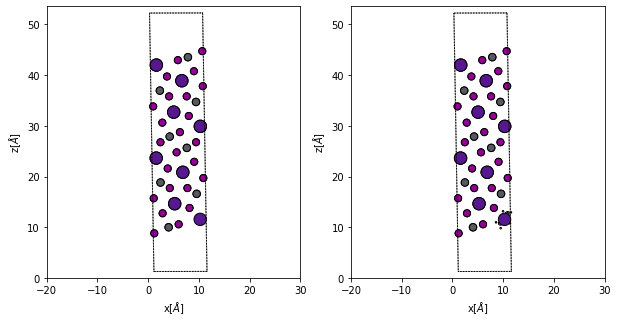

In [172]:
import matplotlib.pyplot as plt
from ase.optimize.sciopt import *               
from ase.utils.geometry import *
from ase.lattice.spacegroup import crystal
from ase.visualize import *
from ase.lattice.surface import surface
from ase import Atoms
from ase import io
from ase.io.cif import read_cif
from ase.io.vasp import write_vasp
from abtem.visualize import show_atoms
from ase.visualize.plot import plot_atoms
from ase.build import add_adsorbate


relaxed_slab = io.read('slab_hexagonal_relaxed.vasp')

num_atoms = len(relaxed_slab.get_chemical_symbols())
i = 0
Cs_index = []
flag = False
while i < num_atoms:
    if(relaxed_slab.get_chemical_symbols()[i] == 'Cs'):
        Cs_index.append((relaxed_slab.positions[i,2], i))
    i = i + 1
        
max_value_z, idz = max(Cs_index, key=lambda item: item[0])

print('Maximum z value:', max_value, "At index:",idz)
relaxed_slab.positions[idz]

#relaxed_slab[[atom.index for atom in relaxed_slab if atom.symbol == 'Cs']].get_positions()[:,2].max()

molecule = io.read('DMA.pdb')
molecule.set_cell(relaxed_slab.cell)

xmin = molecule.get_center_of_mass()[0]
xmax = relaxed_slab.positions[idz, 0]

ymin = molecule.get_center_of_mass()[1]
ymax = relaxed_slab.positions[idz, 1]

zmin = molecule.get_center_of_mass()[2]
zmax = relaxed_slab.positions[idz, 2]

molecule.positions += (xmax - xmin, ymax - ymin, zmax - zmin)

#add_adsorbate(relaxed_slab, molecule, h, 'ontop')

#new_slab.center(vacuum=10.0, axis=2)

del relaxed_slab[idz]

new_slab = relaxed_slab + molecule

view (new_slab)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))

plot_atoms(relaxed_slab, ax1, radii=0.5, rotation=('90x,0y,0z'))
ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')


plot_atoms(new_slab, ax2, radii=0.5, rotation=('90x,0y,0z'))
ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')


#fig.savefig("ase_slab.png")

#view(relaxed_slab)


In [18]:
relaxed_slab.positions[:,2].max()

43.41632934506396

In [ ]:
if (relaxed_slab.get_chemical_symbols()[1] == 'Cs'):
    print(relaxed_slab.positions[1])

In [23]:
num_atoms = len(relaxed_slab.get_chemical_symbols())
i = 0
Cs_index = []
flag = False
while i < num_atoms:
    if(relaxed_slab.get_chemical_symbols()[i] == 'Cs'):
        Cs_index.append((relaxed_slab.positions[i,2], i))
    i = i + 1
        

In [89]:
Cs_index

[(10.257936561662898, 0),
 (13.342631145400766, 1),
 (22.33634476526318, 2),
 (19.537580318803606, 3),
 (10.258007076061965, 4),
 (13.34270244801057, 5),
 (22.336416029443473, 6),
 (19.53750927456094, 7),
 (28.594690842405562, 8),
 (31.3947838563799, 9),
 (40.67096750558789, 10),
 (37.58637898514845, 11),
 (28.594761052517633, 12),
 (31.394857970495416, 13),
 (40.671037615170555, 14),
 (37.586307828482774, 15)]

In [90]:
idz, max_value= max(Cs_index, key=lambda item: item[0])

print('Maximum value:', max_value, "At index:",idz)

Maximum value: 14 At index: 40.671037615170555


In [91]:
relaxed_slab.positions[14]

array([ 9.98490632,  1.23010455, 40.67103762])

In [95]:
relaxed_slab.positions[14, 2]

40.671037615170555

In [167]:
relaxed_slab[[atom.index for atom in relaxed_slab if atom.symbol == 'Cs']].get_positions()[:,2].max()

SyntaxError: invalid syntax (<ipython-input-167-52a410aa6a38>, line 1)

In [155]:
relaxed_slab[[atom.index for atom in relaxed_slab if atom.symbol == 'Cs']]

Atoms(symbols='Cs16', pbc=True, cell=[[10.463476902719863, 2.46250713228e-05, -0.0228011671813861], [7.2679315796e-06, 9.836699213958035, -0.000142218465851], [0.8662205642728402, 0.0007167491559882, 50.95391462296589]])

In [169]:
[atom.index for atom in relaxed_slab if atom.symbol == 'Cs']

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

# hexagonal CsPbI3 001-slab with 2DMA on surface 

Maximum z value: 14 At index: 14
Maximum z value: 14 At index: 10


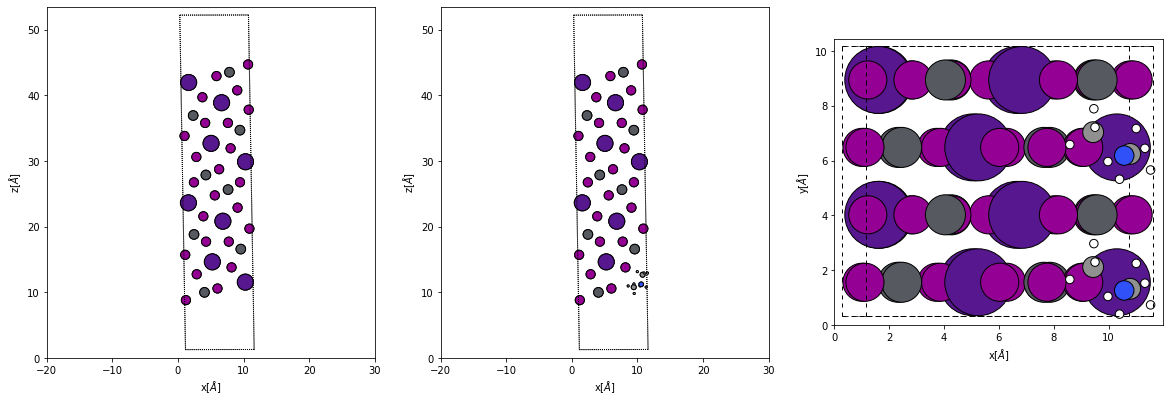

In [201]:
import matplotlib.pyplot as plt
from ase.optimize.sciopt import *               
from ase.utils.geometry import *
from ase.lattice.spacegroup import crystal
from ase.visualize import *
from ase.lattice.surface import surface
from ase import Atoms
from ase import io
from ase.io.cif import read_cif
from ase.io.vasp import write_vasp
from abtem.visualize import show_atoms
from ase.visualize.plot import plot_atoms
from ase.build import add_adsorbate

#relaxed_slab[[atom.index for atom in relaxed_slab if atom.symbol == 'Cs']].get_positions()[:,2].max()

slab = io.read('slab_hexagonal_relaxed.vasp')

relaxed_slab = io.read('slab_hexagonal_relaxed.vasp')
tmp_molecule=[]
num_replace_Cs=2
j = 0
while j < num_replace_Cs:
    num_atoms = len(relaxed_slab.get_chemical_symbols())
    i = 0
    Cs_index = []
    flag = False
    while i < num_atoms:
        if(relaxed_slab.get_chemical_symbols()[i] == 'Cs'):
            Cs_index.append((relaxed_slab.positions[i,2], i))
        i = i + 1
        
    max_value_z, idz = max(Cs_index, key=lambda item: item[0])

    print('Maximum z value:', max_value, "At index:",idz)
    relaxed_slab.positions[idz]

    molecule = io.read('DMA.pdb')
    molecule.set_cell(relaxed_slab.cell)

    xmin = molecule.get_center_of_mass()[0]
    xmax = relaxed_slab.positions[idz, 0]
    ymin = molecule.get_center_of_mass()[1]
    ymax = relaxed_slab.positions[idz, 1]
    zmin = molecule.get_center_of_mass()[2]
    zmax = relaxed_slab.positions[idz, 2]
    
    molecule.positions += (xmax - xmin, ymax - ymin, zmax - zmin)

    if j==0:
        tmp_molecule = molecule 
    else:
        tmp_molecule += molecule
        
    del relaxed_slab[idz]
    
    j = j+1

#add_adsorbate(relaxed_slab, molecule, h, 'ontop')
#new_slab.center(vacuum=10.0, axis=2)

new_slab = relaxed_slab + tmp_molecule
new_slab = sort(new_slab)
view (new_slab)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(slab, ax1, radii=0.5, rotation=('90x,0y,0z'))
ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')


plot_atoms(new_slab, ax2, radii=0.5, rotation=('90x,0y,0z'))
ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')


plot_atoms(new_slab, ax3, radii=0.5, rotation=('0x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

#fig.savefig("ase_slab.png")

#view(relaxed_slab)

# write the cell to a vaps file

write_vasp('delta_001_2DMA_top.vasp', new_slab, vasp5=True, direct=True)


In [175]:
tmp_molecule

[Atom('N', [10.284349077598073, 0.9312448726006748, 41.01049219612644], index=0),
 Atom('H', [11.039349077598072, 1.1952448726006741, 41.43749219612644], index=1),
 Atom('H', [10.113349077598073, 0.06824487260067524, 41.24549219612644], index=2),
 Atom('C', [10.501349077598071, 0.9912448726006753, 39.542492196126446], index=3),
 Atom('H', [11.245349077598071, 0.405244872600675, 39.296492196126444], index=4),
 Atom('H', [10.722349077598071, 1.9182448726006749, 39.28749219612644], index=5),
 Atom('H', [9.690349077598071, 0.7132448726006748, 39.076492196126445], index=6),
 Atom('C', [9.150349077598072, 1.7842448726006745, 41.43849219612645], index=7),
 Atom('H', [9.177349077598072, 2.639244872600675, 40.95349219612645], index=8),
 Atom('H', [9.219349077598071, 1.9642448726006743, 42.40349219612644], index=9),
 Atom('H', [8.301349077598072, 1.3332448726006758, 41.253492196126444], index=10),
 Atom('N', [10.284351196337832, 5.849592682767449, 41.01042208654378], index=0),
 Atom('H', [11.039

# Cubic CsPbI3 slab with 2DMA on surface

Maximum z value: 14 At index: 0
Maximum z value: 14 At index: 0


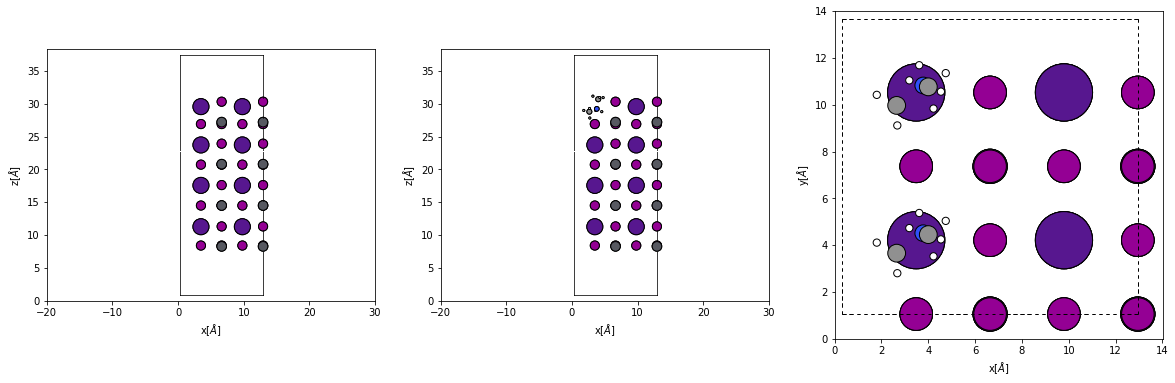

In [200]:
import matplotlib.pyplot as plt
from ase.optimize.sciopt import *               
from ase.utils.geometry import *
from ase.lattice.spacegroup import crystal
from ase.visualize import *
from ase.lattice.surface import surface
from ase import Atoms
from ase import io
from ase.io.cif import read_cif
from ase.io.vasp import write_vasp
from abtem.visualize import show_atoms
from ase.visualize.plot import plot_atoms
from ase.build import add_adsorbate

#relaxed_slab[[atom.index for atom in relaxed_slab if atom.symbol == 'Cs']].get_positions()[:,2].max()

slab = io.read('slab_cubic_relaxed.vasp')

relaxed_slab = io.read('slab_cubic_relaxed.vasp')
tmp_molecule=[]
num_replace_Cs=2
j = 0
while j < num_replace_Cs:
    num_atoms = len(relaxed_slab.get_chemical_symbols())
    i = 0
    Cs_index = []
    flag = False
    while i < num_atoms:
        if(relaxed_slab.get_chemical_symbols()[i] == 'Cs'):
            Cs_index.append((relaxed_slab.positions[i,2], i))
        i = i + 1
        
    max_value_z, idz = min(Cs_index, key=lambda item: item[0])

    print('Maximum z value:', max_value, "At index:",idz)
    relaxed_slab.positions[idz]

    molecule = io.read('DMA.pdb')
    molecule.set_cell(relaxed_slab.cell)

    xmin = molecule.get_center_of_mass()[0]
    xmax = relaxed_slab.positions[idz, 0]
    ymin = molecule.get_center_of_mass()[1]
    ymax = relaxed_slab.positions[idz, 1]
    zmin = molecule.get_center_of_mass()[2]
    zmax = relaxed_slab.positions[idz, 2]
    
    molecule.positions += (xmax - xmin, ymax - ymin, zmax - zmin)

    if j==0:
        tmp_molecule = molecule 
    else:
        tmp_molecule += molecule
        
    del relaxed_slab[idz]
    
    j = j+1

#add_adsorbate(relaxed_slab, molecule, h, 'ontop')
#new_slab.center(vacuum=10.0, axis=2)

new_slab = relaxed_slab + tmp_molecule
new_slab = sort(new_slab)
view (new_slab)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(slab, ax1, radii=0.5, rotation=('90x,0y,0z'))
ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')


plot_atoms(new_slab, ax2, radii=0.5, rotation=('90x,0y,0z'))
ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')


plot_atoms(new_slab, ax3, radii=0.5, rotation=('180x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

#fig.savefig("ase_slab.png")

#view(relaxed_slab)

# write the cell to a vaps file

write_vasp('cubic_001_2DMA_top.vasp', new_slab, vasp5=True, direct=True)